In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [37]:
# select scheme
scheme_name = str("Roe")
# if-else statement
path = "inlet-result/"

## Iterative convergence

In [38]:
cell_list = ["53x17", "105x33", "209x65"]

In [39]:
conv_steps_van = np.array([13922, 24660, 45956])
conv_steps_roe = np.array([13922, 24660, 45956])
conv_steps = conv_steps_van if scheme_name == "Van-Leer" else conv_steps_roe

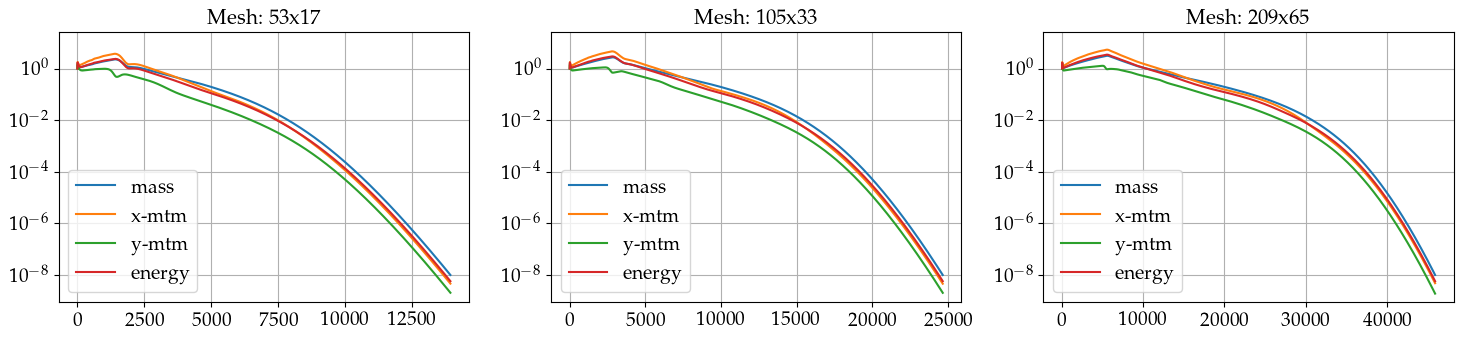

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(18, 3.5))
for (i, cell) in enumerate(cell_list):
    n = i%3;
    resi = np.loadtxt(path + "residual_{}.txt".format(cell))[0:int(conv_steps[i])]
    axs[n].semilogy(np.arange(0,int(conv_steps[i])), resi[:,0]/resi[0,0], 'C0', label="mass")
    axs[n].semilogy(np.arange(0,int(conv_steps[i])), resi[:,1]/resi[0,1], 'C1', label="x-mtm")
    axs[n].semilogy(np.arange(0,int(conv_steps[i])), resi[:,2]/resi[0,2], 'C2', label="y-mtm")
    axs[n].semilogy(np.arange(0,int(conv_steps[i])), resi[:,3]/resi[0,3], 'C3', label="energy")
    axs[n].grid()
    axs[n].xaxis.set_tick_params(labelsize=14)
    axs[n].yaxis.set_tick_params(labelsize=14)
    axs[n].set_ylim(0.9*10**(-9), 25)
    axs[n].legend(fontsize=14)
    axs[n].set_title("Mesh: {}".format(cell),fontsize=15)
plt.savefig("figs/Inlet_{}_residual.pdf".format(scheme_name),bbox_inches='tight')
plt.show()

## observed order of accuracy

In [7]:
def getInfiNorm(mat1, mat2):
    return np.max(abs(mat1-mat2))

In [8]:
def getL1Norm(mat1,mat2):
    return np.mean(abs(mat1-mat2))

In [9]:
def getL2Norm(mat1,mat2):
    return np.sqrt(np.mean((mat1-mat2)**2))

### Van Leer & Roe

In [10]:
cell_list = ["2d9", "2d17", "2d33", "2d65", "2d129"]

In [11]:
infiNorm_arr = np.zeros(5)
l1Norm_arr = np.zeros(5)
l2Norm_arr = np.zeros(5)
h_arr = np.array([1, 2, 4, 8, 16])
for (i, cell) in zip(range(0,6), cell_list):
    V = np.loadtxt(path + "My-solution-{}.dat".format(cell),skiprows=5)
    V_exact = np.loadtxt(path + "MMS-{}.dat".format(cell),skiprows=5)
    infi_norm = getInfiNorm(V[:,2], V_exact[:,2])
    l1_norm = getL1Norm(V[:,2], V_exact[:,2])
    l2_norm = getL2Norm(V[:,2], V_exact[:,2])
    infiNorm_arr[i] = infi_norm
    l1Norm_arr[i] = l1_norm
    l2Norm_arr[i] = l2_norm

In [12]:
OoA_infi = np.zeros(4)
OoA_l1 = np.zeros(4)
OoA_l2 = np.zeros(4)
for i in range(0,4):
    OoA_infi[i] = np.log10(abs(infiNorm_arr[::-1][i+1]/infiNorm_arr[::-1][i]))/np.log10(2)
    OoA_l1[i] = np.log10(abs(l1Norm_arr[::-1][i+1]/l1Norm_arr[::-1][i]))/np.log10(2)
    OoA_l2[i] = np.log10(abs(l2Norm_arr[::-1][i+1]/l2Norm_arr[::-1][i]))/np.log10(2)

In [13]:
x = np.linspace(0.8, 20, 100)
y1 = x/200
y2 = x**2/2500

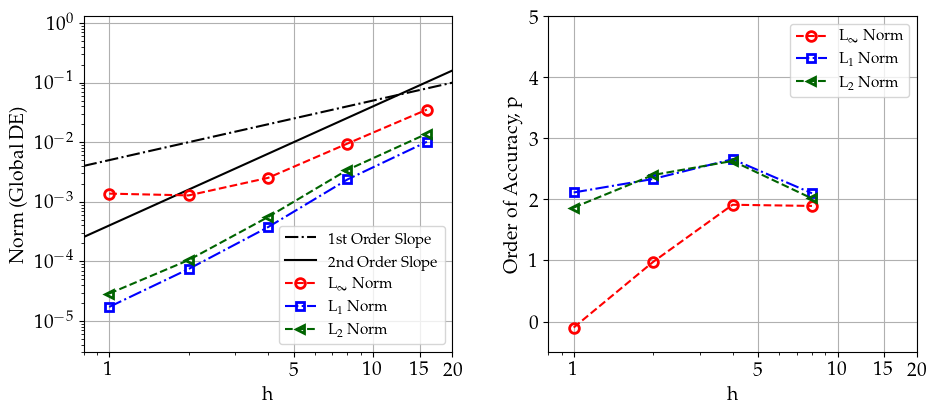

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4.8))
# subfigure 1
axs[0].loglog(x,y1,'k-.',label="1st Order Slope")
axs[0].loglog(x,y2,'k-',label="2nd Order Slope")
axs[0].loglog(h_arr,infiNorm_arr[::-1],linestyle='--',marker='o',markersize=7,color='red',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_\infty$ Norm")
axs[0].loglog(h_arr,l1Norm_arr[::-1],linestyle='-.',marker='s',markersize=6.3,color='blue',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_1$ Norm")
axs[0].loglog(h_arr,l2Norm_arr[::-1],linestyle='--',marker='<',markersize=6.3,color='darkgreen',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_2$ Norm")
axs[0].set_ylim(0.3*10**(-5), 1.3)
axs[0].set_ylabel("Norm (Global DE)",fontsize=14)

# subfigure2
axs[1].plot(h_arr[0:-1],OoA_infi,linestyle='--',marker='o',markersize=7,color='red',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_\infty$ Norm")
axs[1].plot(h_arr[0:-1],OoA_l1,linestyle='-.',marker='s',markersize=6.3,color='blue',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_1$ Norm")
axs[1].plot(h_arr[0:-1],OoA_l2,linestyle='--',marker='<',markersize=6.3,color='darkgreen',\
          markeredgewidth=2,markerfacecolor="None",label=r"L$_2$ Norm")
axs[1].set_ylim(-0.5,5)
axs[1].set_xscale('log')
axs[1].set_ylabel("Order of Accuracy, p",fontsize=14)

for i in range(0,2):
    axs[i].grid()
    axs[i].set_xlabel('h',fontsize=14)
    axs[i].set_xlim(0.8, 20)
    axs[i].set_xticks([1,5,10,15,20],['1','5','10','15','20'])
    axs[i].legend(fontsize=11)
    axs[i].xaxis.set_tick_params(labelsize=14)
    axs[i].yaxis.set_tick_params(labelsize=14)

fig.tight_layout(pad=3.0)
plt.savefig("figs/supersonic_{}_order-of-accuracy.pdf".format(scheme_name),bbox_inches='tight')
plt.show()